# Final Project Submission

Please fill out:
* Student name: Joey Husney
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL: https://jhusney1.github.io/why_is_multicollinearity_a_problem_for_linear_regression


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

## Project goals and methodology

As a real estate agency, our goal is to give recommendations to customers on how to increase the value of their home. This will be done through analyzing the data in the "King County House Sales" dataset and investigating which features are correlated with higher sales prices. Using the OSEMN process, we hope to give suggestions that are meaningful and reliable. The OSEMN framework consists of an iterative process of Obtaining the data, Scrubbing it, Exploring, Modeling, and iNterpreting the data into meaningful suggestions for the client.

## The Data

The king county house sales dataset contains data from houses in the Seattle Washington area sold between the time period May 2014 - May 2015. The following features are contained in this dataset:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# OBTAIN

In [239]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from scipy import stats
import statsmodels.api as sm  
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

pd.options.display.max_columns = 100

plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = (20,15)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [123]:
# read dataset into df
df = pd.read_csv('kc_house_data.csv')
df.drop(['id'], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,nan,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


In [124]:
df.shape

(21597, 20)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


## Observations
* May want to remove date column
* sqft basement should be a float instead of string
* Get rid of null values
* Separate categorical and continuous columns

# SCRUB

### Modify necessary datatypes

In [126]:
df_cleaned = df.copy()
df_cleaned.drop(['date'], axis=1, inplace=True)

In [127]:
df_cleaned.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Check for NULL values

In [128]:
df_cleaned.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Deal with null values

In [129]:
df_cleaned['waterfront'].head()

0       nan
1   0.00000
2   0.00000
3   0.00000
4   0.00000
Name: waterfront, dtype: float64

In [130]:
df_cleaned['waterfront'].value_counts(normalize=True, dropna=False)

0.00000   0.88322
nan       0.11002
1.00000   0.00676
Name: waterfront, dtype: float64

<AxesSubplot:xlabel='price'>

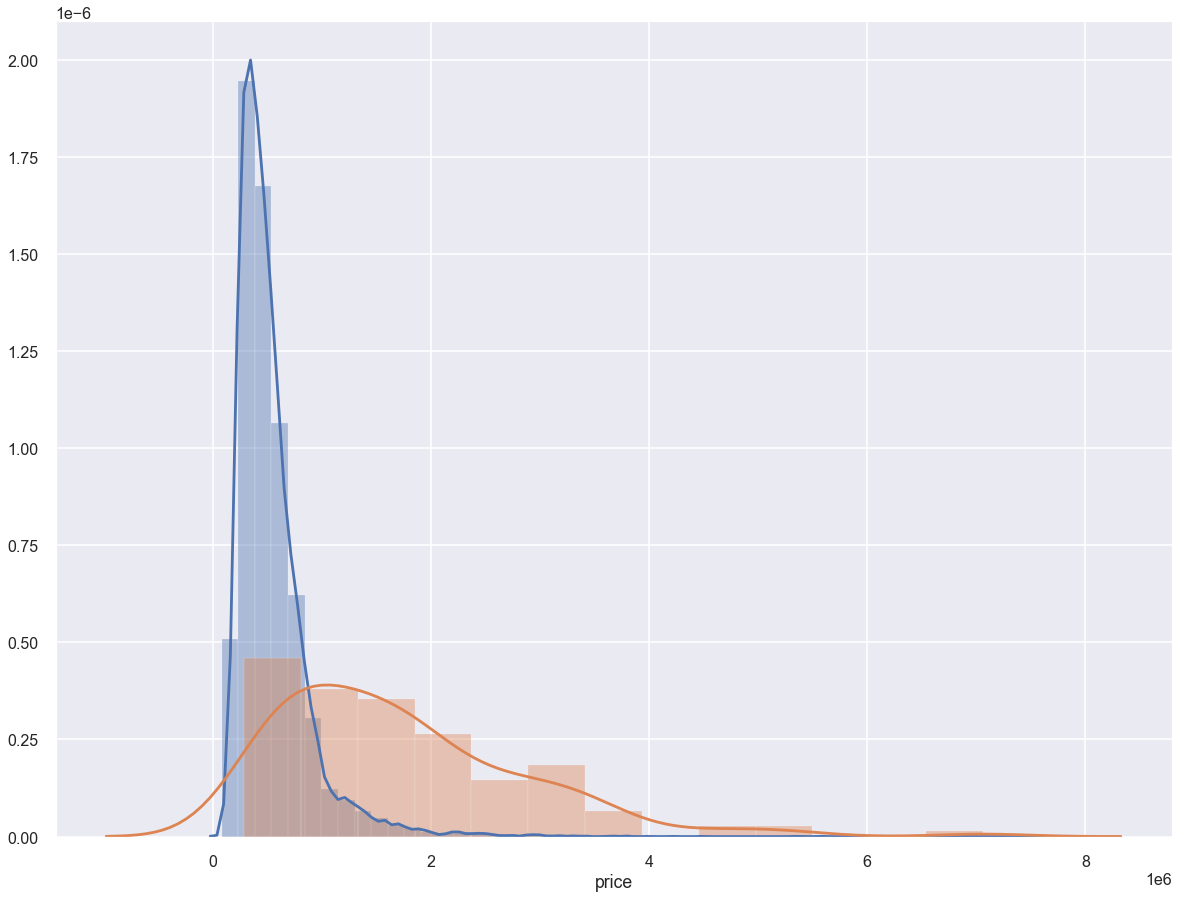

In [131]:
# Does waterfront have an effect on price?
df_no_waterfront = df_cleaned[df_cleaned['waterfront'] == 0] 
df_yes_waterfront = df_cleaned[df_cleaned['waterfront'] == 1] 
sns.distplot(df_no_waterfront['price'], label='no waterfront')
sns.distplot(df_yes_waterfront['price'], label='with waterfront')

### Seems like sale price increases due to waterfront, therefore, this feature will stay. We will get rid of null values by replacing the nulls with 0 assuming they don't have a waterfront if it's unavailable.

In [132]:
# replace null values with zero
df_cleaned['waterfront'].fillna(0, inplace=True)

In [133]:
df_cleaned['waterfront'].value_counts(normalize=True, dropna=False)

0.00000   0.99324
1.00000   0.00676
Name: waterfront, dtype: float64

### Now let's anylize the null values in view column

In [134]:
df_cleaned['view'].value_counts(normalize=True, dropna=False)

0.00000   0.89929
2.00000   0.04431
3.00000   0.02352
1.00000   0.01528
4.00000   0.01468
nan       0.00292
Name: view, dtype: float64

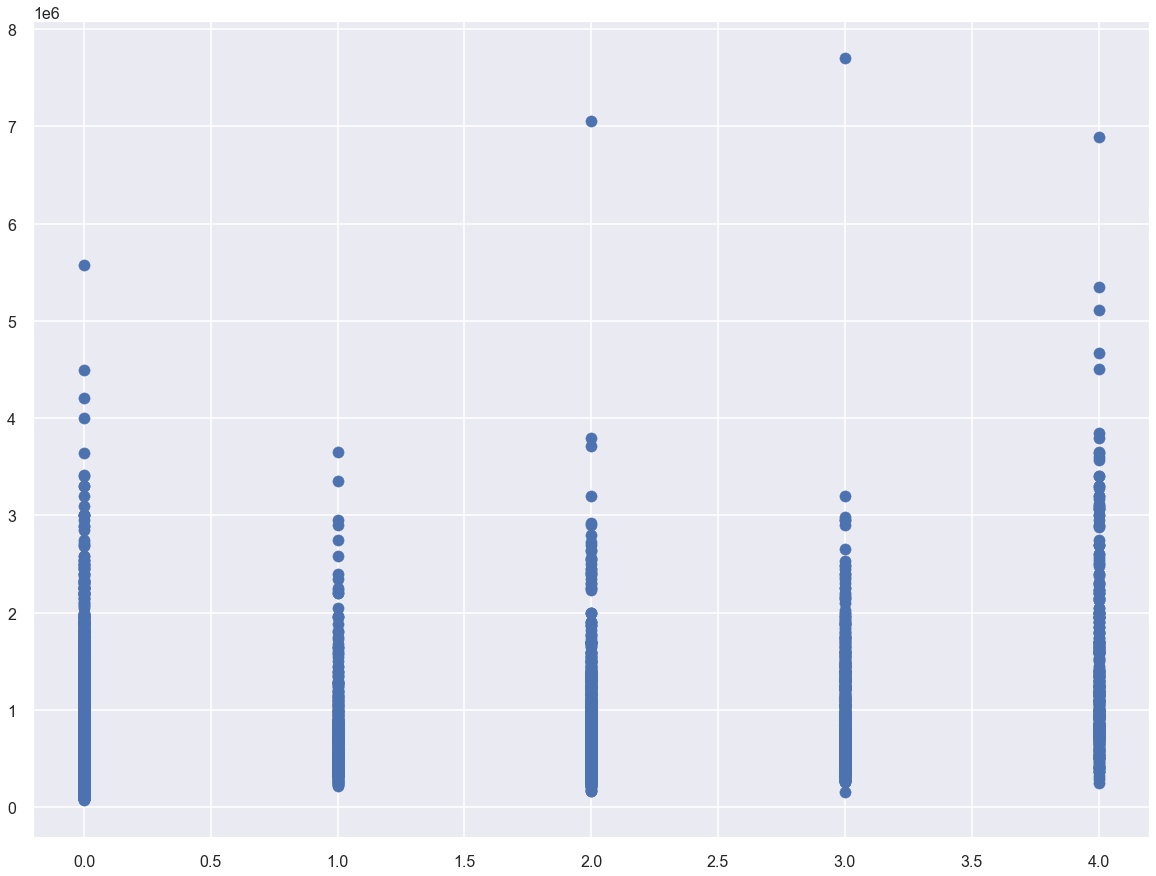

In [135]:
fig, ax = plt.subplots()
ax.scatter(df_cleaned['view'], df_cleaned['price'])

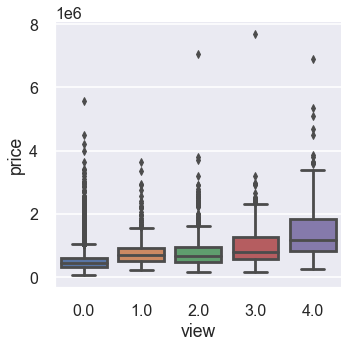

In [136]:
sns.catplot(data=df_cleaned, x='view', y='price', kind='box')

### There doesn't seem to be a significant correlation between how many times the house has been viewed and the price. Dropping column

In [137]:
df_cleaned.drop(['view'], axis=1, inplace=True)
df_cleaned.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [138]:
# Lets see how much of yr_renovated column consists of null values
df_cleaned['yr_renovated'].value_counts(normalize=True, dropna=False)

0.00000      0.78766
nan          0.17790
2014.00000   0.00338
2003.00000   0.00144
2013.00000   0.00144
               ...  
1944.00000   0.00005
1948.00000   0.00005
1976.00000   0.00005
1934.00000   0.00005
1953.00000   0.00005
Name: yr_renovated, Length: 71, dtype: float64

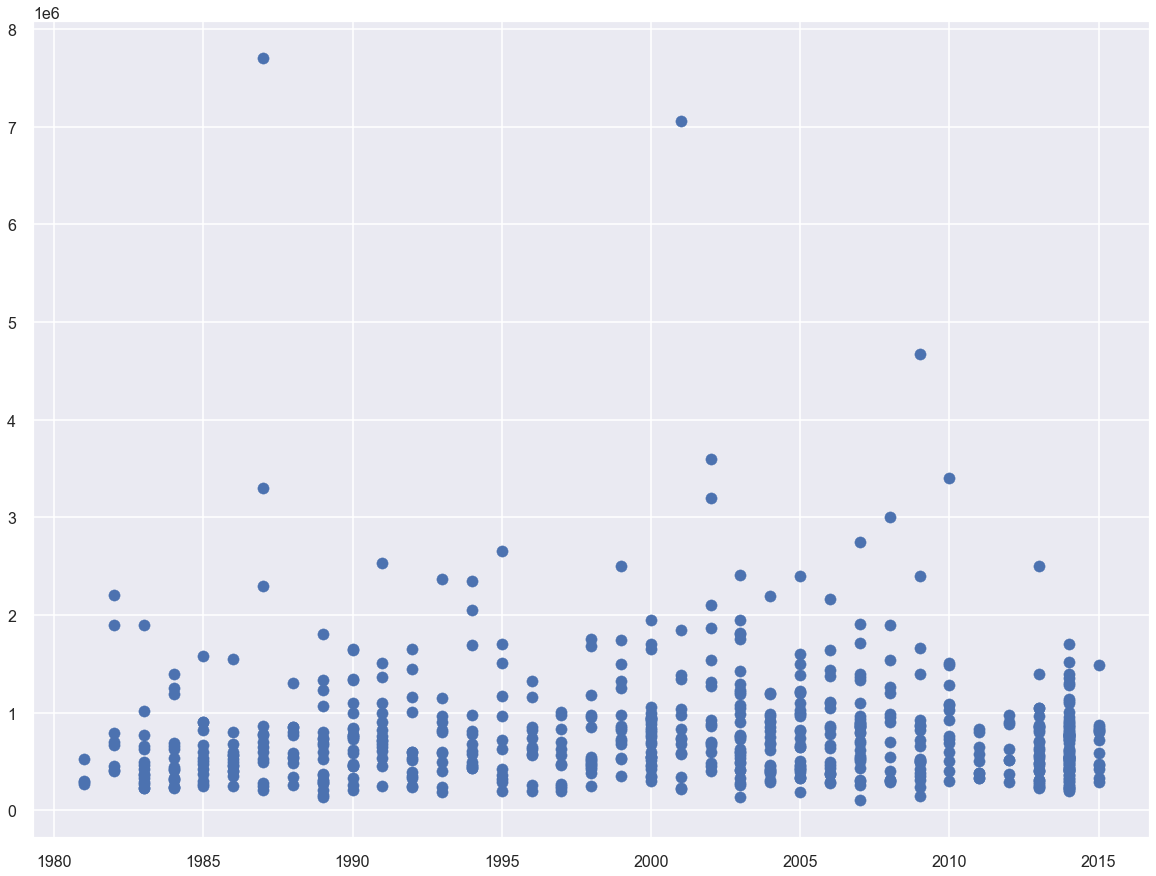

In [139]:
# Check if the year it was renovated makes a significant difference
fig, ax = plt.subplots()
ax.scatter(df_cleaned['yr_renovated'][df_cleaned['yr_renovated'] > 1980], df_cleaned['price'][df_cleaned['yr_renovated'] > 1980])

> Because 78% of these houses were not renovated, we will make this column into a 0 and 1's column based on whether each particular house was renovated or not. Especially because the specific year that it was renovated doesn't seem to affect the price

In [140]:
def convert_to_bool(x):
    if x > 0:
        x = 1
    else:
        x = 0
    return x

In [141]:
df_cleaned['yr_renovated'] = df_cleaned['yr_renovated'].map(convert_to_bool)

In [142]:
df_cleaned['yr_renovated'].value_counts(normalize=True, dropna=False)

0   0.96555
1   0.03445
Name: yr_renovated, dtype: float64

In [143]:
# column will represent if it was renovated or not
df_cleaned.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,3,7,1180,0.0,1955,0,98178,47.51120,-122.25700,1340,5650
1,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,3,7,2170,400.0,1951,1,98125,47.72100,-122.31900,1690,7639
2,180000.00000,2,1.00000,770,10000,1.00000,0.00000,3,6,770,0.0,1933,0,98028,47.73790,-122.23300,2720,8062
3,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,5,7,1050,910.0,1965,0,98136,47.52080,-122.39300,1360,5000
4,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,3,8,1680,0.0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00000,3,2.50000,1530,1131,3.00000,0.00000,3,8,1530,0.0,2009,0,98103,47.69930,-122.34600,1530,1509
21593,400000.00000,4,2.50000,2310,5813,2.00000,0.00000,3,8,2310,0.0,2014,0,98146,47.51070,-122.36200,1830,7200
21594,402101.00000,2,0.75000,1020,1350,2.00000,0.00000,3,7,1020,0.0,2009,0,98144,47.59440,-122.29900,1020,2007
21595,400000.00000,3,2.50000,1600,2388,2.00000,0.00000,3,8,1600,0.0,2004,0,98027,47.53450,-122.06900,1410,1287


In [144]:
df_cleaned['renovated'].value_counts(normalize=True, dropna=False)

0   0.96555
1   0.03445
Name: renovated, dtype: float64

In [145]:
df_cleaned.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> We now got rid of all known null values!

### Convert sqft_basement from String to Float data type

In [146]:
df_cleaned['sqft_basement'] = pd.to_numeric(df_cleaned['sqft_basement'], errors='coerce')
df_cleaned['sqft_basement']

0         0.00000
1       400.00000
2         0.00000
3       910.00000
4         0.00000
           ...   
21592     0.00000
21593     0.00000
21594     0.00000
21595     0.00000
21596     0.00000
Name: sqft_basement, Length: 21597, dtype: float64

In [147]:
#check for nulls
df_cleaned['sqft_basement'].value_counts(normalize=True, dropna=False)

0.00000      0.59388
nan          0.02102
600.00000    0.01005
500.00000    0.00968
700.00000    0.00963
               ...  
588.00000    0.00005
1920.00000   0.00005
2390.00000   0.00005
1245.00000   0.00005
1135.00000   0.00005
Name: sqft_basement, Length: 304, dtype: float64

### Something must be done about these newly discovered null values. We will assume that a null value means no basement. Partially because the mode is zero anyhow.

In [148]:
df_cleaned['sqft_basement'].fillna(0, inplace=True)
df_cleaned['sqft_basement'].value_counts(normalize=True, dropna=False)

0.00000      0.61490
600.00000    0.01005
500.00000    0.00968
700.00000    0.00963
800.00000    0.00931
               ...  
915.00000    0.00005
295.00000    0.00005
1281.00000   0.00005
2130.00000   0.00005
906.00000    0.00005
Name: sqft_basement, Length: 303, dtype: float64

In [149]:
def check_multicol(df):
    
    corr = df.corr().abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0, annot=True)

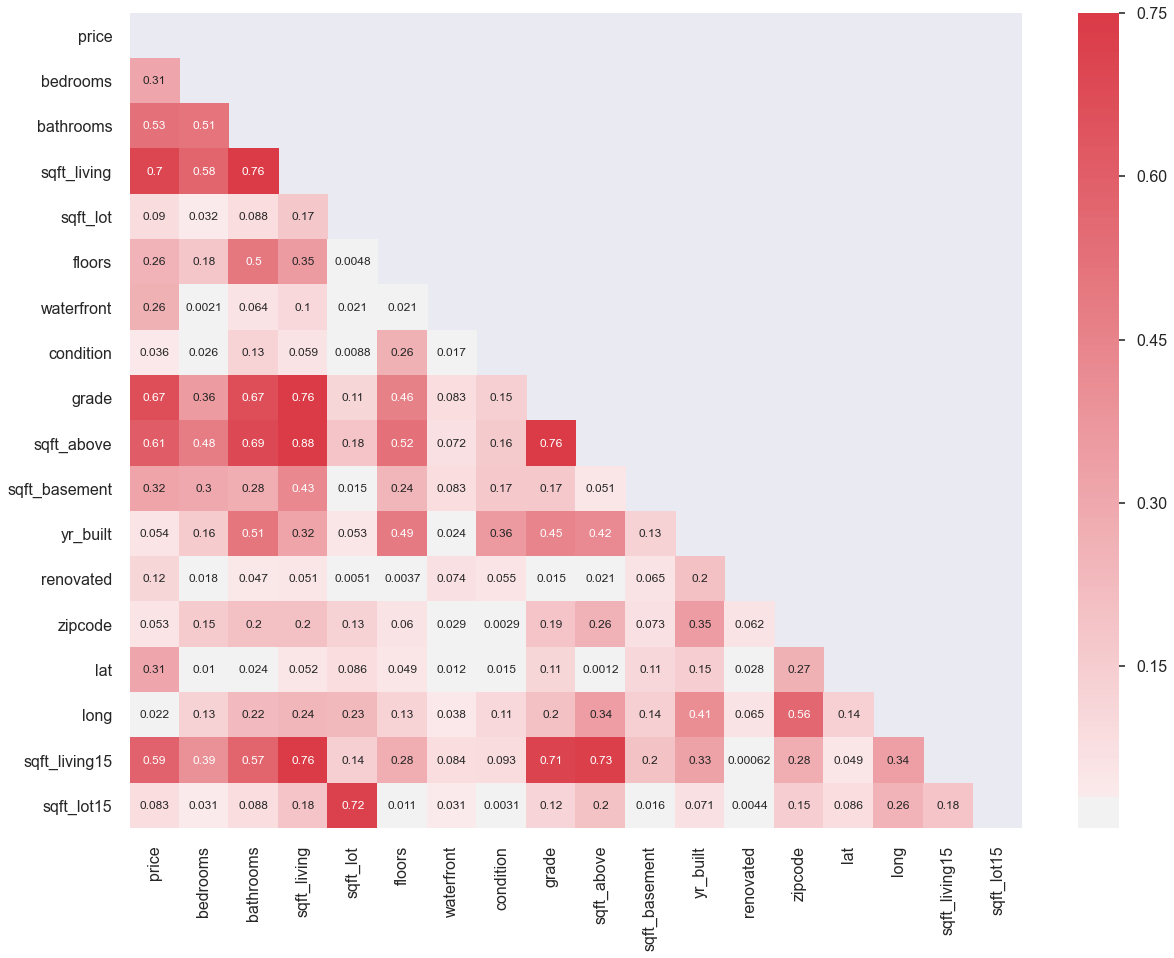

In [150]:
plt.rcParams['figure.figsize'] = (20,15)
check_multicol(df_cleaned)

### Multicollinearity found in following combinations:
* sqft_above and sqft_living
* sqft_living and bathrooms
* grade and sqft_living
* sqft_above and sqft_living
* sqft_above and grade
* sqft_living15 and sqft_living
* sqft_living15 and sqft_above
* sqft_living15 and grade
* sqft_lot15 and sqft_lot

In [151]:
# High multicolinearity occuring in sqft_living
# Check if it adds any value to dataset
sqft_sample = df_cleaned[df_cleaned['sqft_basement'] > 0].sample(5, random_state=15)
sqft_sample[['sqft_above', 'sqft_living', 'sqft_basement']]

,sqft_above,sqft_living,sqft_basement
8367,1080,1370,290.00000
20021,2242,3490,1248.00000
16657,1100,2110,1010.00000
20430,1140,1405,265.00000
12953,1500,2750,1250.00000


### Drop sqft_living - can be calculated by adding basement and above square footage

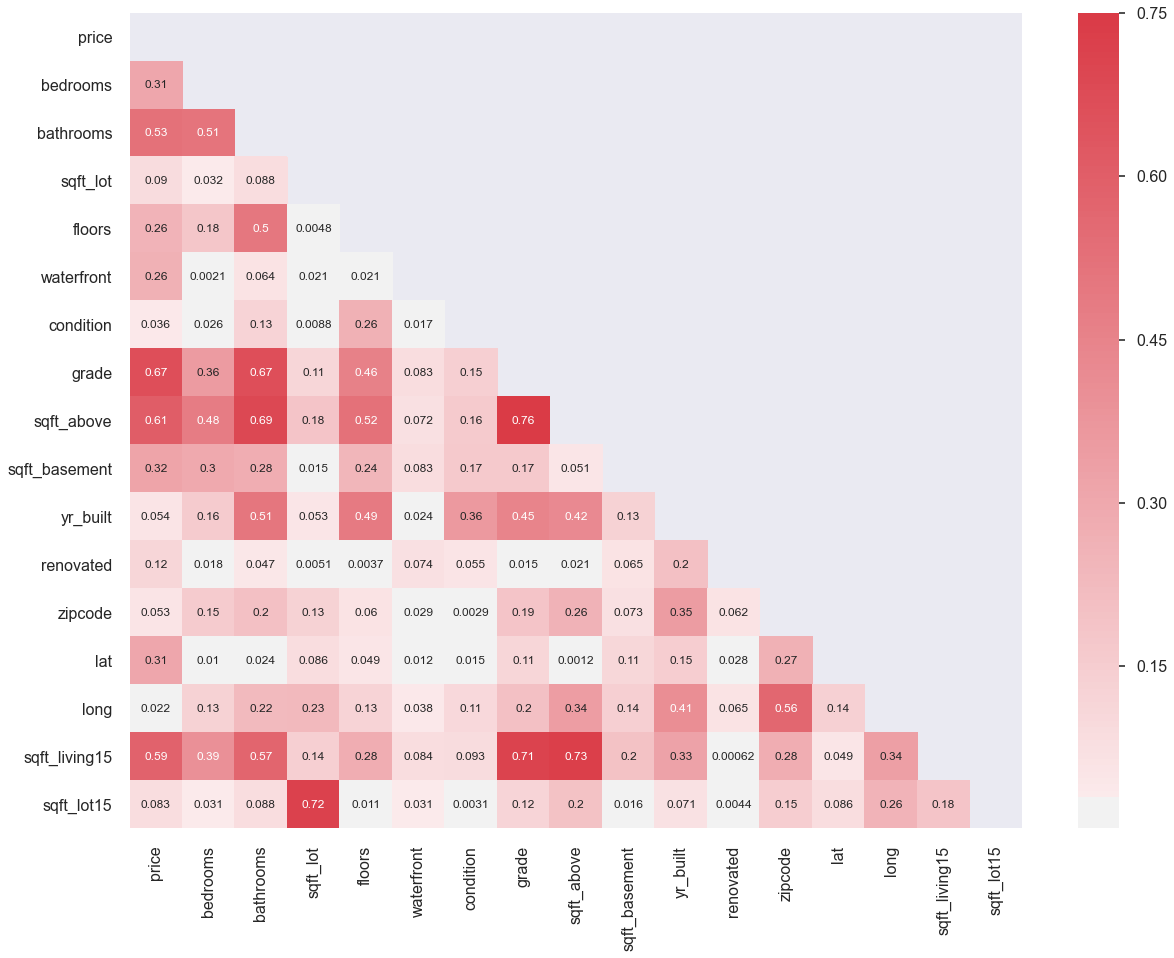

In [152]:
df_cleaned.drop(['sqft_living'], axis=1, inplace=True)
check_multicol(df_cleaned)

### Drop some other columns that aren't so important in the bigger scheme of things

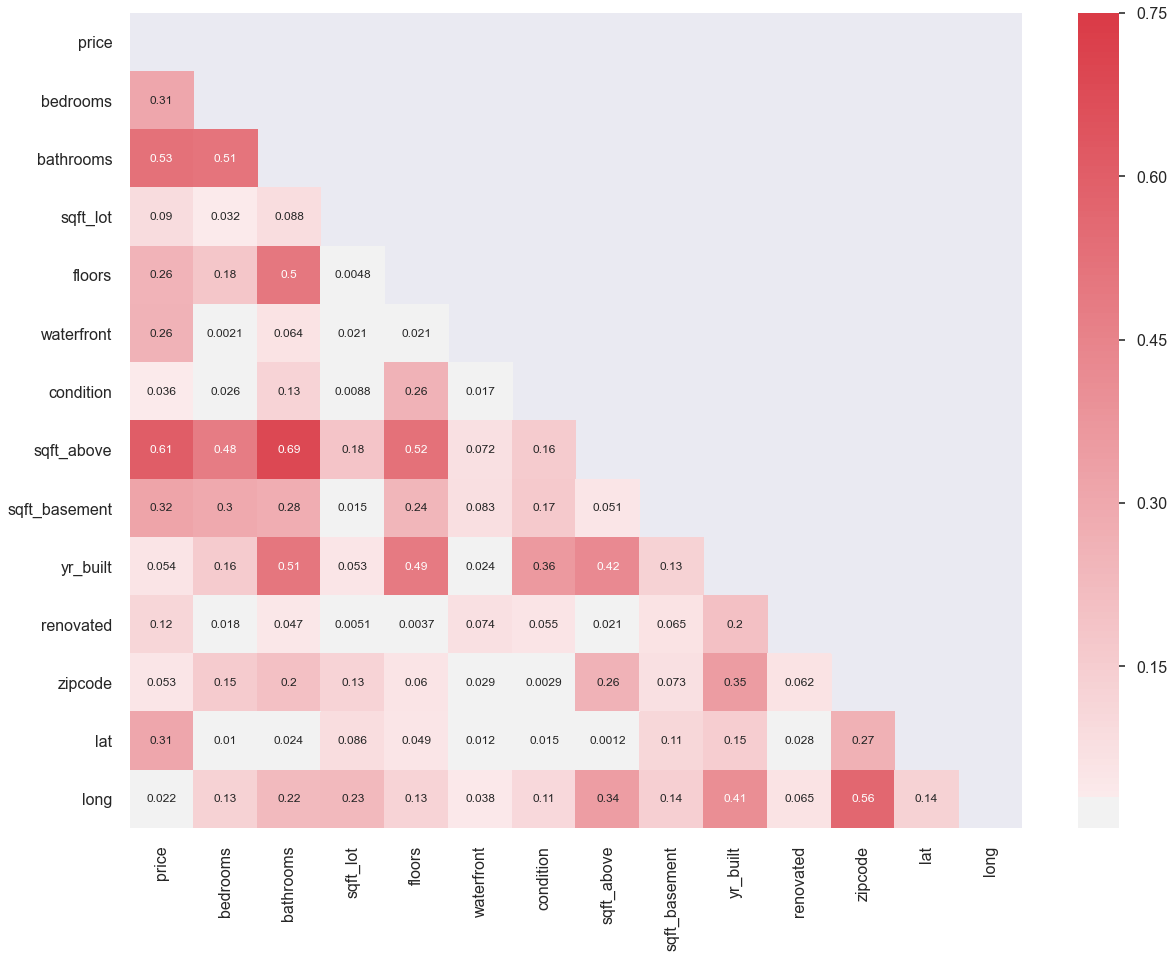

In [153]:
df_cleaned.drop(['sqft_living15'], inplace=True, axis=1)
df_cleaned.drop(['sqft_lot15'], inplace=True, axis=1)
df_cleaned.drop(['grade'], inplace=True, axis=1)
check_multicol(df_cleaned)

# EXPLORE

### Identify outliers

<AxesSubplot:xlabel='price'>

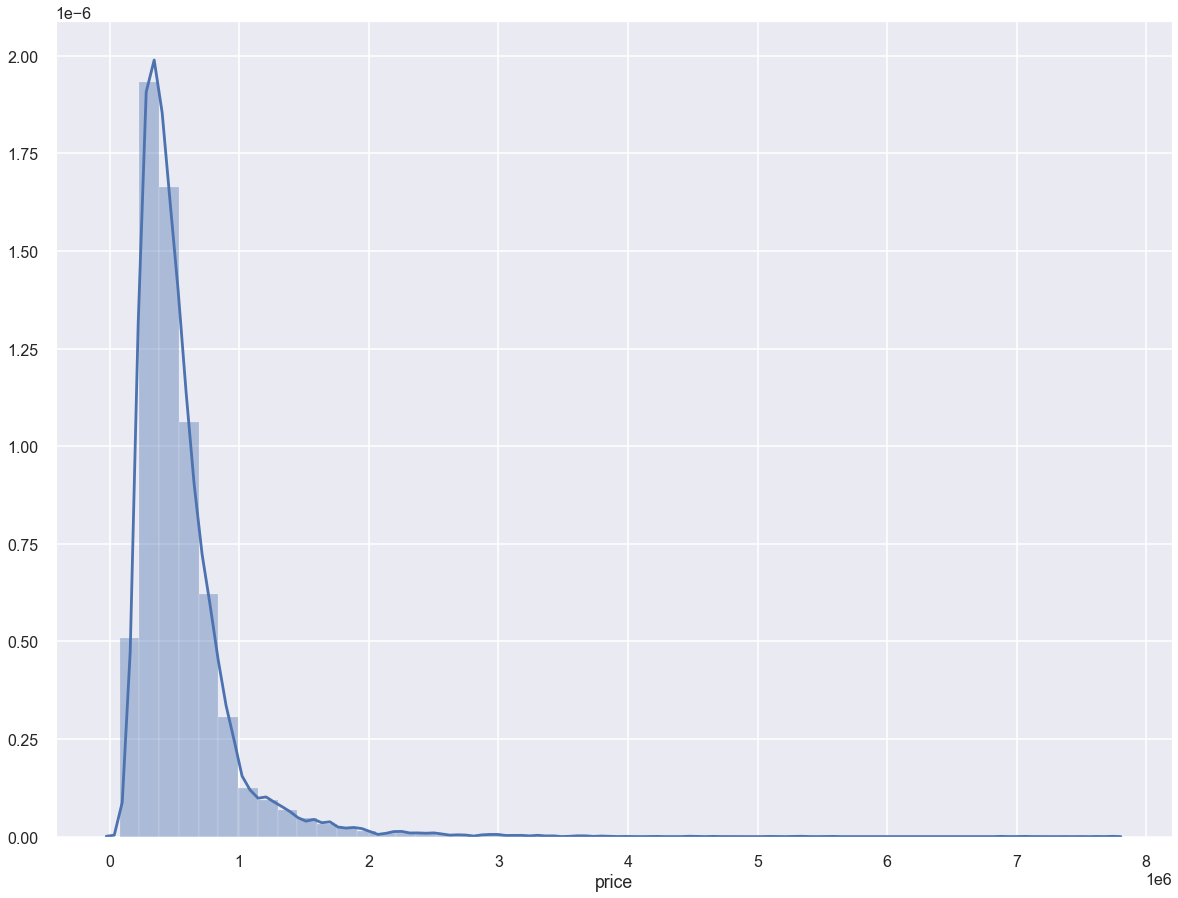

In [154]:
target = 'price'
sns.distplot(df_cleaned[target])

<AxesSubplot:xlabel='price'>

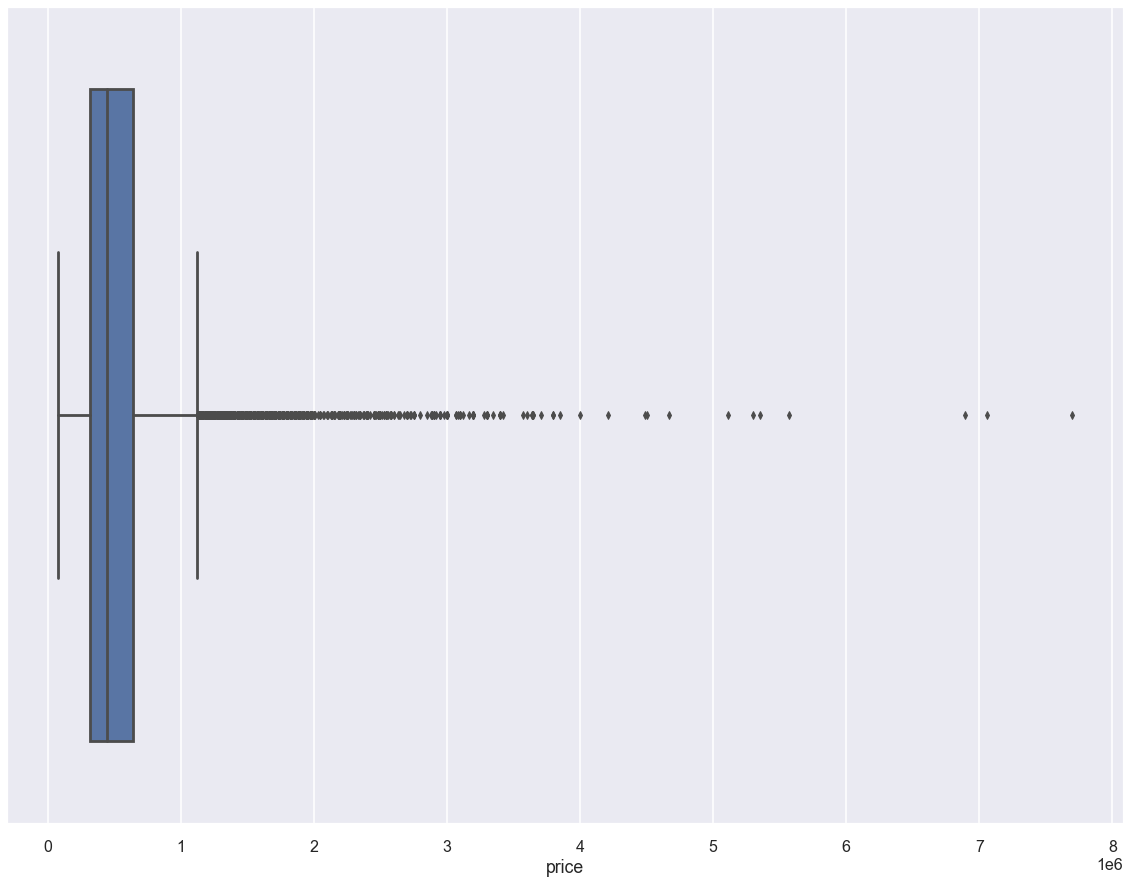

In [155]:
sns.boxplot(df_cleaned[target])

> We see clearly from both the histogram and the whisker plot that there are many outliers for price column

### Remove outliers

In [156]:
import scipy
z_price = scipy.stats.zscore(df_cleaned['price'])
z_price = np.abs(z_price)
z_price

array([0.86671627, 0.00625157, 0.98077344, ..., 0.37618606, 0.38190525,
       0.58606486])

<AxesSubplot:xlabel='price'>

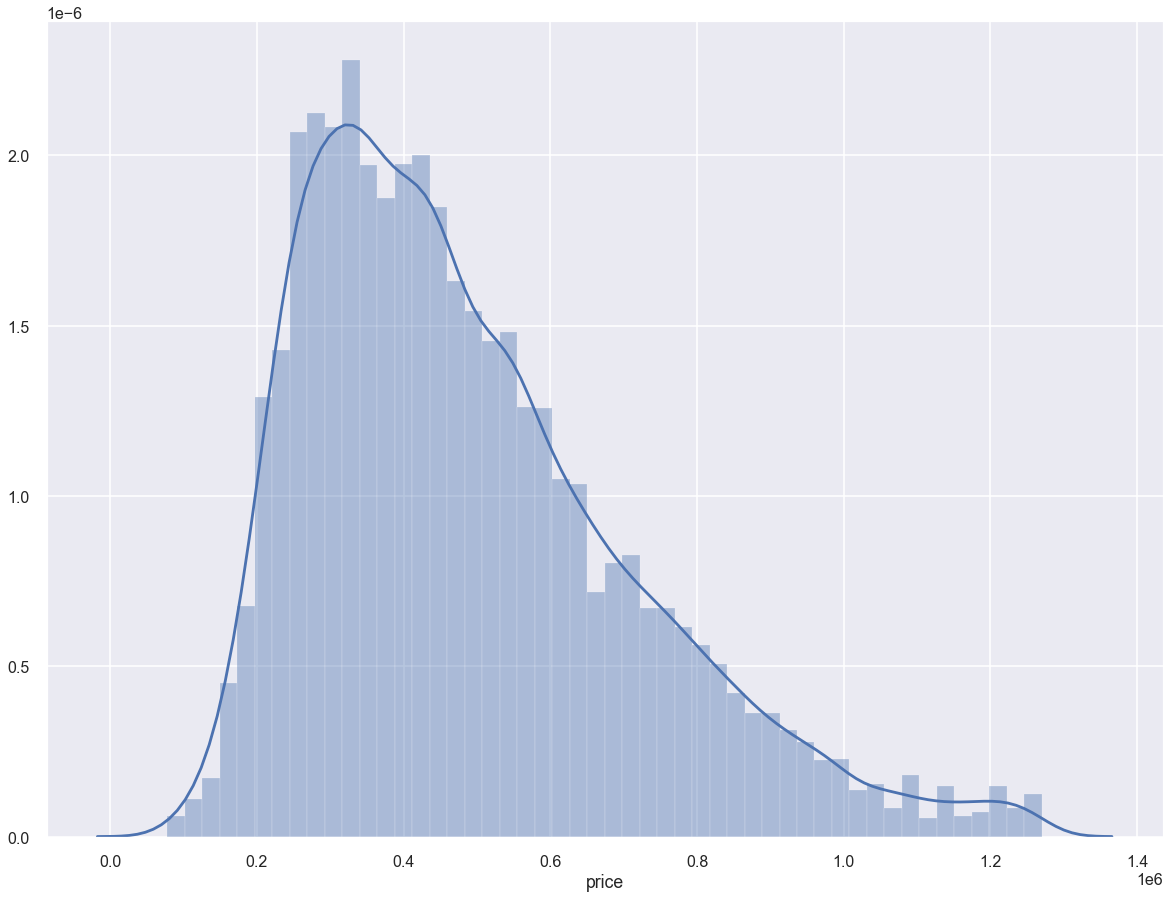

In [157]:
# Preview histogram before changing
sns.distplot(df_cleaned[z_price < 2]['price'])

In [158]:
# Make changes
df_cleaned = df_cleaned[z_price < 3]
df_cleaned.shape

# Maybe go back and remove more outliers from other cols based on modeling

(21191, 14)

<AxesSubplot:xlabel='price'>

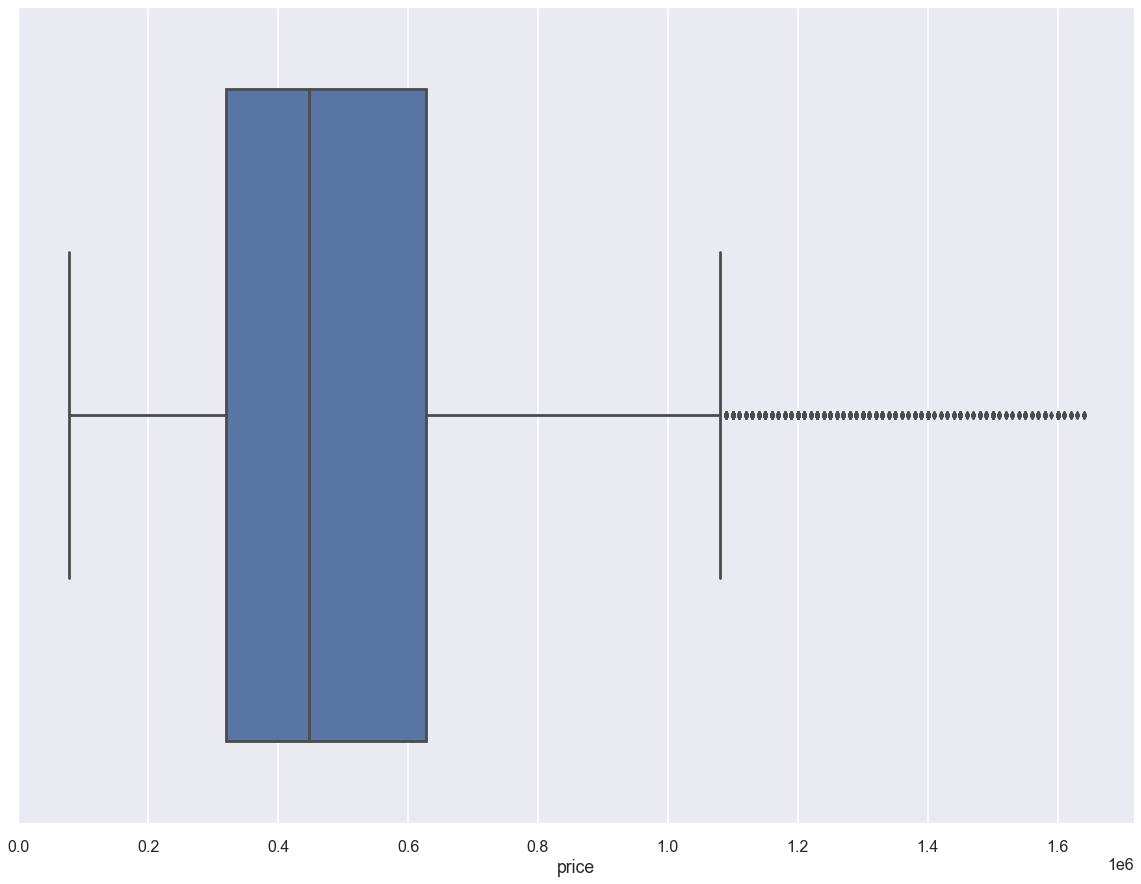

In [159]:
sns.boxplot(df_cleaned[target])

### Make sure data is accurate

In [160]:
df_cleaned.describe().round(2)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
count,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000
mean,507010.29000,3.36000,2.09000,14826.73000,1.49000,0.00000,3.41000,1751.50000,275.05000,1970.93000,0.03000,98078.29000,47.56000,-122.21000
std,259462.21000,0.92000,0.74000,40400.95000,0.54000,0.06000,0.65000,772.21000,422.58000,29.29000,0.18000,53.41000,0.14000,0.14000
min,78000.00000,1.00000,0.50000,520.00000,1.00000,0.00000,1.00000,370.00000,0.00000,1900.00000,0.00000,98001.00000,47.16000,-122.52000
25%,320000.00000,3.00000,1.50000,5005.50000,1.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47000,-122.33000
50%,447000.00000,3.00000,2.25000,7560.00000,1.00000,0.00000,3.00000,1544.00000,0.00000,1975.00000,0.00000,98065.00000,47.57000,-122.23000
75%,627650.00000,4.00000,2.50000,10490.50000,2.00000,0.00000,4.00000,2170.00000,530.00000,1996.00000,0.00000,98118.00000,47.68000,-122.12000
max,1640000.00000,33.00000,7.50000,1651359.00000,3.50000,1.00000,5.00000,7320.00000,2850.00000,2015.00000,1.00000,98199.00000,47.78000,-121.32000


### Doesn't seem likely that a house will contain 33 bedrooms. Let's inspect that row

In [161]:
df_cleaned[df_cleaned['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
15856,640000.00000,33,1.75000,6000,1.00000,0.00000,5,1040,580.00000,1947,0,98103,47.68780,-122.33100


In [162]:
# compare other rows with 3 bedrooms to see if it meant to say 3
df_cleaned[(df_cleaned['bedrooms'] == 3) & (df_cleaned['bathrooms'] == 2) & (df_cleaned['floors'] == 1) & (df_cleaned['sqft_basement'] != 0)].head(10)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
164,420000.00000,3,2.00000,38332,1.00000,0.00000,4,1010,1010.00000,1975,0,98027,47.45820,-122.02300
221,279950.00000,3,2.00000,9750,1.00000,0.00000,3,1350,400.00000,1961,0,98198,47.39800,-122.29900
236,416000.00000,3,2.00000,94300,1.00000,0.00000,5,1640,580.00000,1976,0,98010,47.34590,-121.95000
250,260000.00000,3,2.00000,7209,1.00000,0.00000,4,1240,570.00000,1978,0,98032,47.36560,-122.27800
316,487000.00000,3,2.00000,14052,1.00000,0.00000,5,1720,870.00000,1948,0,98133,47.73570,-122.33300
387,252350.00000,3,2.00000,7352,1.00000,0.00000,3,1160,490.00000,1979,0,98058,47.46120,-122.16900
427,1300000.00000,3,2.00000,15021,1.00000,0.00000,4,1770,580.00000,1976,0,98004,47.64080,-122.21900
468,340500.00000,3,2.00000,28025,1.00000,0.00000,4,1920,350.00000,1947,0,98168,47.48570,-122.31800
494,397500.00000,3,2.00000,6710,1.00000,0.00000,3,1070,440.00000,1972,0,98034,47.71930,-122.21600
608,223000.00000,3,2.00000,6824,1.00000,0.00000,3,1300,370.00000,1990,0,98042,47.36660,-122.08400


In [163]:
# Delete row
df_cleaned = df_cleaned[df_cleaned['bedrooms'] != 33] 
df_cleaned.describe().round(2)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
count,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000
mean,507004.02000,3.35000,2.09000,14827.15000,1.49000,0.00000,3.41000,1751.53000,275.03000,1970.93000,0.03000,98078.29000,47.56000,-122.21000
std,259466.72000,0.89000,0.74000,40401.85000,0.54000,0.06000,0.65000,772.21000,422.59000,29.29000,0.18000,53.41000,0.14000,0.14000
min,78000.00000,1.00000,0.50000,520.00000,1.00000,0.00000,1.00000,370.00000,0.00000,1900.00000,0.00000,98001.00000,47.16000,-122.52000
25%,320000.00000,3.00000,1.50000,5005.25000,1.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47000,-122.33000
50%,447000.00000,3.00000,2.25000,7560.00000,1.00000,0.00000,3.00000,1547.00000,0.00000,1975.00000,0.00000,98065.00000,47.57000,-122.23000
75%,627500.00000,4.00000,2.50000,10490.75000,2.00000,0.00000,4.00000,2170.00000,530.00000,1996.00000,0.00000,98118.00000,47.68000,-122.12000
max,1640000.00000,11.00000,7.50000,1651359.00000,3.50000,1.00000,5.00000,7320.00000,2850.00000,2015.00000,1.00000,98199.00000,47.78000,-121.32000


### One hot encode zip code 

In [175]:
cat_cols = ['zipcode']
df_preproccesed_ohe = pd.get_dummies(data=df_cleaned, columns= cat_cols, drop_first=True)
df_preproccesed_ohe.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,renovated,lat,long,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.00000,3,1.00000,5650,1.00000,0.00000,3,1180,0.00000,1955,0,47.51120,-122.25700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.00000,3,2.25000,7242,2.00000,0.00000,3,2170,400.00000,1951,1,47.72100,-122.31900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.00000,2,1.00000,10000,1.00000,0.00000,3,770,0.00000,1933,0,47.73790,-122.23300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.00000,4,3.00000,5000,1.00000,0.00000,5,1050,910.00000,1965,0,47.52080,-122.39300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.00000,3,2.00000,8080,1.00000,0.00000,3,1680,0.00000,1987,0,47.61680,-122.04500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# MODEL

## Train test split

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
target = 'price'
x_cols = list(df_preproccesed_ohe.columns)
x_cols.remove(target)

In [212]:
train, test = train_test_split(df_preproccesed_ohe, random_state=52)

In [213]:
def model_data(df_ohe_, target='price'):

    df_ohe = df_ohe_.copy()
    
    feat = '+'.join(df_ohe.drop(columns=target).columns)
    f = target + '~'+ feat
    model = ols(formula=f, data=df_ohe).fit()
    return model

In [214]:
model = model_data(train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     778.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:48:04   Log-Likelihood:            -2.0792e+05
No. Observations:               15892   AIC:                         4.160e+05
Df Residuals:                   15810   BIC:                         4.166e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.399e+07   5.17e+06     -4.641      0.000   -3.41e+07   -1.39e+07
bedrooms      -2.133e+04   1353.811    -15.757      0.000    -2.4e+04   -1.87e+04
bathrooms      2.427e+04   2248.474     10.795      0.000    1.99e+04    2.87e+04
sqft_lot          0.2803      0.025     11.356      0.000       0.232       0.329
floors        -2.572e+04   2700.977     -9.523      0.000    -3.1e+04   -2.04e+04
waterfront      4.28e+05   1.57e+04     27.306      0.000    3.97e+05    4.59e+05
condition      2.516e+04   1623.832     15.493      0.000     2.2e+04    2.83e+04
sqft_above      213.3397      2.066    103.266      0.000     209.290     217.389
sqft_basement   133.4232      2.915     45.767      0.000     127.709     139.137
yr_built       -117.0635     52.567     -2.227      0.026    -220.101     -14.026
renovated      4.301e+04   5413.771      7.944      0.000    3.24e+04    5.36e+04
lat            2.018e+05   5.35e+04      3.769      0.000    9.69e+04    3.07e+05
long          -1.189e+05   3.84e+04     -3.098      0.002   -1.94e+05   -4.37e+04
zipcode_98002   -43.3948   1.19e+04     -0.004      0.997   -2.34e+04    2.33e+04
zipcode_98003  1200.8238   1.07e+04      0.112      0.911   -1.98e+04    2.22e+04
zipcode_98004  5.928e+05   2.01e+04     29.503      0.000    5.53e+05    6.32e+05
zipcode_98005  3.009e+05    2.1e+04     14.322      0.000     2.6e+05    3.42e+05
zipcode_98006  2.984e+05   1.72e+04     17.316      0.000    2.65e+05    3.32e+05
zipcode_98007  2.321e+05   2.13e+04     10.878      0.000     1.9e+05    2.74e+05
zipcode_98008  2.329e+05   2.07e+04     11.241      0.000    1.92e+05    2.74e+05
zipcode_98010  8.444e+04   1.83e+04      4.623      0.000    4.86e+04     1.2e+05
zipcode_98011  5.508e+04    2.7e+04      2.043      0.041    2238.147    1.08e+05
zipcode_98014  6.676e+04   2.93e+04      2.277      0.023    9279.803    1.24e+05
zipcode_98019  3.194e+04   2.92e+04      1.094      0.274   -2.53e+04    8.92e+04
zipcode_98022  6.343e+04    1.6e+04      3.954      0.000     3.2e+04    9.49e+04
zipcode_98023 -2.386e+04   9943.942     -2.400      0.016   -4.34e+04   -4373.086
zipcode_98024  1.453e+05   2.59e+04      5.615      0.000    9.46e+04    1.96e+05
zipcode_98027  1.788e+05   1.77e+04     10.120      0.000    1.44e+05    2.13e+05
zipcode_98028   5.84e+04   2.62e+04      2.229      0.026    7036.248     1.1e+05
zipcode_98029  2.267e+05   2.02e+04     11.231      0.000    1.87e+05    2.66e+05
zipcode_98030 -4763.6027   1.17e+04     -0.407      0.684   -2.77e+04    1.82e+04
zipcode_98031  -626.2128   1.23e+04     -0.051      0.959   -2.47e+04    2.35e+04
zipcode_98032 -9986.8859   1.39e+04     -0.717      0.473   -3.73e+04    1.73e+04
zipcode_98033  3.091e+05   2.25e+04     13.753      0.000    2.65e+05    3.53e+05
zipcode_98034  1.268e+05   2.41e+04      5.268   

> Initial model showing high p-values in certain zip codes. The r squared is around 80% meaning that 80% of the model explains around 80% of the data points. This is certainly high enough. However, we need to check for some assumptions of linear regression.

## Check homoscedasticity and normality 

In [215]:
# Checking homoscedasticity and normality for initial model
def check_for_assumptions(residuals):
    
# make qq plot
    fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
    sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
    axes[0].set_title('QQ Plot', fontsize=18)
    
# check for homoscedasticity
    ax=axes[1]
    ax.scatter(train['price'], model.resid)
    ax.axhline(0, color='red')
    axes[1].set_title('Homoscedasticity', fontsize=18)
    axes[1].set_xlabel('Price', fontsize=15)
    axes[1].set_ylabel('Residuals', fontsize=14)
    plt.show();

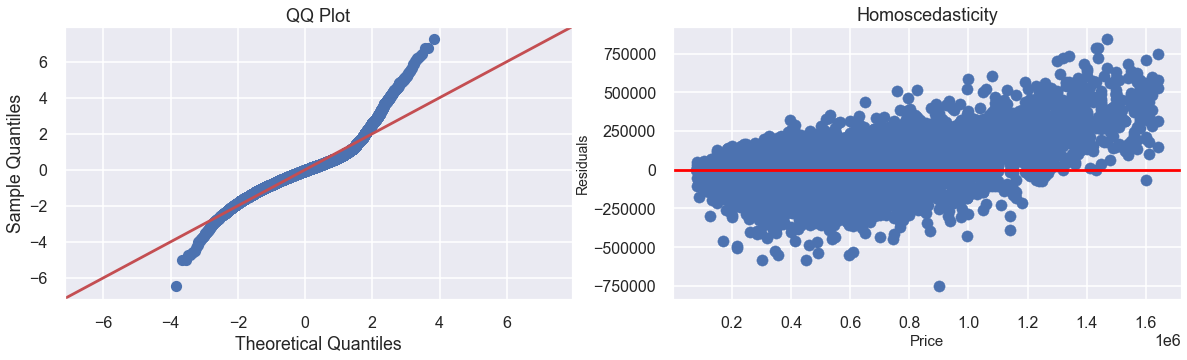

In [216]:
check_for_assumptions(model.resid)

> There seems to be a curve in the qq-plot telling us that the data could be more normally distributed. Toward the higher price range houses, there seems to be an issue with homoscedasticity.

### Feature selection

In [217]:
# Getting rid of high p values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
keep_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
keep_cols.remove('Intercept')
keep_cols.append('price')
print(len(p_table), len(keep_cols))
print(keep_cols)

82 67
['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'renovated', 'lat', 'long', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98056', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146'

In [218]:
train = train[list(keep_cols)]
model = model_data(train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     954.8
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:48:08   Log-Likelihood:            -2.0793e+05
No. Observations:               15892   AIC:                         4.160e+05
Df Residuals:                   15825   BIC:                         4.165e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.609e+07   3.18e+06     -8.203      0.000   -3.23e+07   -1.99e+07
bedrooms      -2.138e+04   1352.219    -15.812      0.000    -2.4e+04   -1.87e+04
bathrooms      2.442e+04   2245.089     10.877      0.000       2e+04    2.88e+04
sqft_lot          0.2795      0.025     11.342      0.000       0.231       0.328
floors        -2.577e+04   2694.065     -9.567      0.000   -3.11e+04   -2.05e+04
waterfront     4.299e+05   1.56e+04     27.469      0.000    3.99e+05    4.61e+05
condition       2.52e+04   1617.159     15.583      0.000     2.2e+04    2.84e+04
sqft_above      213.3365      2.063    103.434      0.000     209.294     217.379
sqft_basement   133.4472      2.909     45.874      0.000     127.745     139.149
yr_built       -121.9746     52.168     -2.338      0.019    -224.229     -19.720
renovated      4.307e+04   5411.335      7.959      0.000    3.25e+04    5.37e+04
lat            2.751e+05   2.13e+04     12.911      0.000    2.33e+05    3.17e+05
long          -1.078e+05   2.18e+04     -4.944      0.000   -1.51e+05   -6.51e+04
zipcode_98004  5.685e+05   1.02e+04     55.992      0.000    5.49e+05    5.88e+05
zipcode_98005  2.766e+05   1.16e+04     23.796      0.000    2.54e+05    2.99e+05
zipcode_98006  2.775e+05   7381.978     37.597      0.000    2.63e+05    2.92e+05
zipcode_98007  2.073e+05   1.16e+04     17.946      0.000    1.85e+05     2.3e+05
zipcode_98008  2.077e+05   9536.511     21.776      0.000    1.89e+05    2.26e+05
zipcode_98010  7.858e+04   1.43e+04      5.477      0.000    5.05e+04    1.07e+05
zipcode_98011  2.038e+04   1.24e+04      1.643      0.100   -3933.029    4.47e+04
zipcode_98014  3.452e+04   1.43e+04      2.411      0.016    6459.966    6.26e+04
zipcode_98022  6.647e+04   1.15e+04      5.765      0.000    4.39e+04    8.91e+04
zipcode_98023 -2.403e+04   7257.440     -3.311      0.001   -3.83e+04   -9803.858
zipcode_98024  1.217e+05   1.63e+04      7.488      0.000    8.99e+04    1.54e+05
zipcode_98027  1.596e+05   7972.403     20.025      0.000    1.44e+05    1.75e+05
zipcode_98028  2.423e+04   1.15e+04      2.102      0.036    1638.381    4.68e+04
zipcode_98029  2.043e+05   9009.467     22.677      0.000    1.87e+05    2.22e+05
zipcode_98033  2.798e+05   9087.476     30.785      0.000    2.62e+05    2.98e+05
zipcode_98034   9.47e+04   9152.227     10.347      0.000    7.68e+04    1.13e+05
zipcode_98038  2.905e+04   7195.863      4.037      0.000    1.49e+04    4.32e+04
zipcode_98039  7.582e+05   3.06e+04     24.752      0.000    6.98e+05    8.18e+05
zipcode_98040  4.768e+05   9587.698     49.728      0.000    4.58e+05    4.96e+05
zipcode_98045  1.137e+05   1.33e+04      8.540      0.000    8.76e+04     1.4e+05
zipcode_98052  1.792e+05   8167.063     21.943      0.000    1.63e+05    1.95e+05
zipcode_98053  1.427e+05   9359.617     15.245   

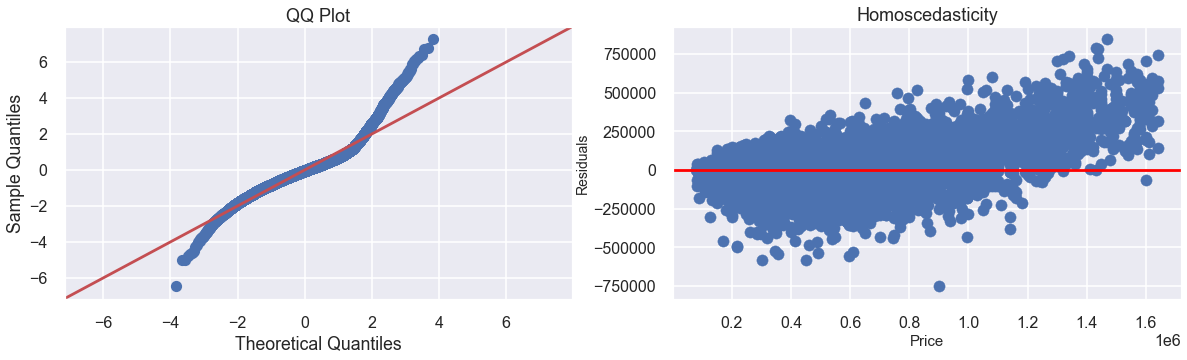

In [219]:
check_for_assumptions(model.resid)

> We can see that model didn't change much as a result of removing high p-values

### Going to log transform data to fit assumptions

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

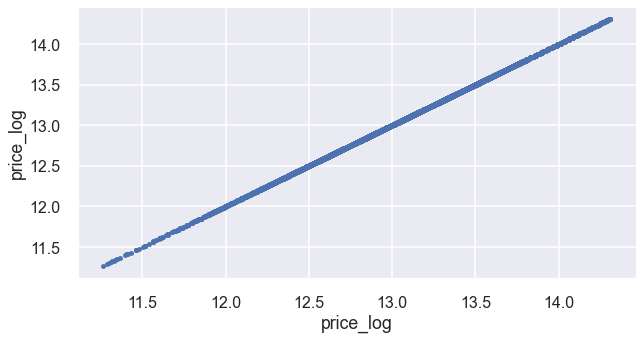

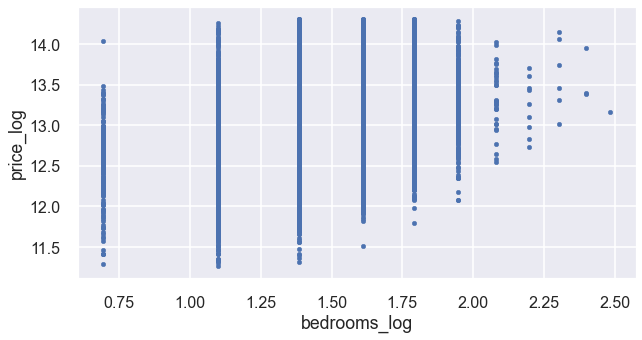

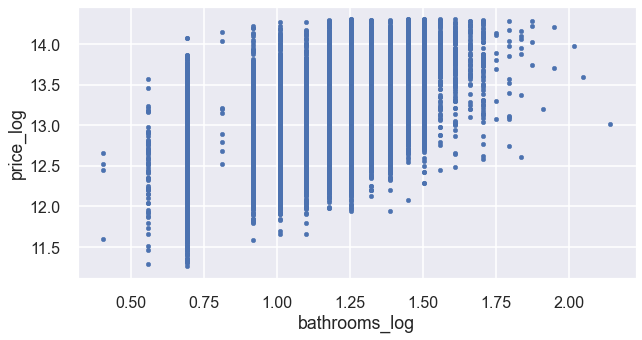

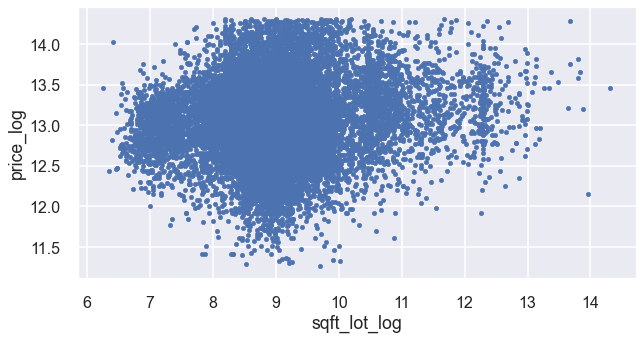

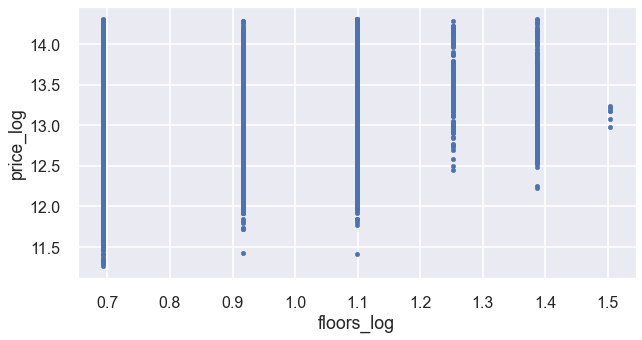

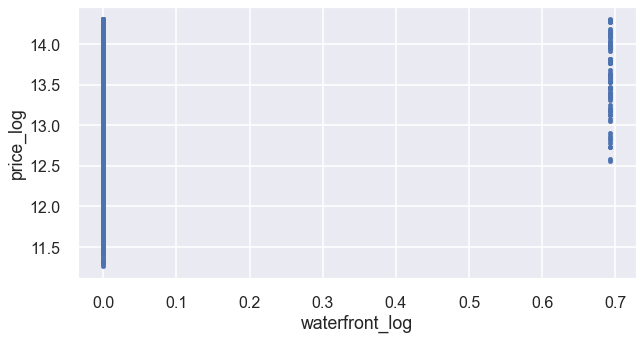

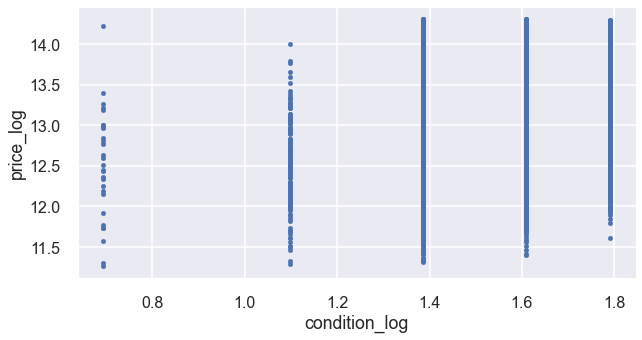

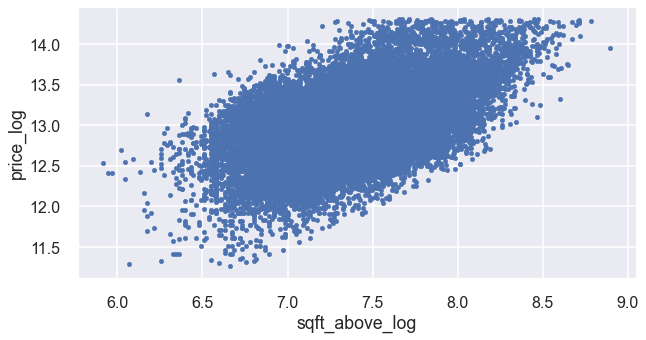

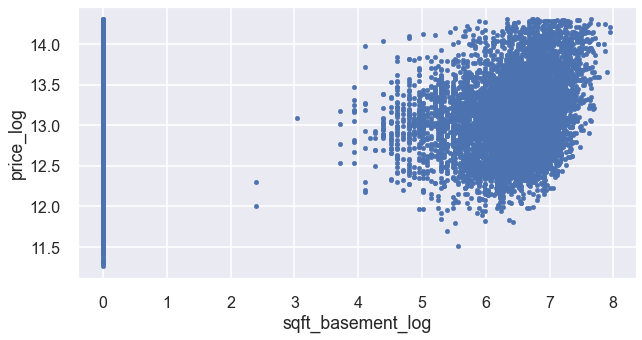

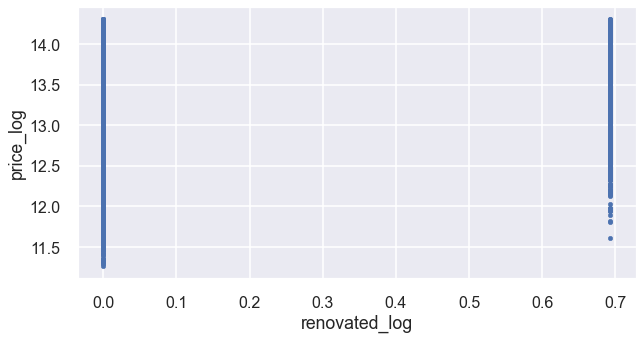

In [65]:
# df_logged = pd.DataFrame([])

# for col in df_cleaned.drop(['zipcode', 'long', 'lat', 'yr_built'], axis=1).columns:
#     df_logged[col+'_log'] = np.log(df_cleaned[col]+1)

# for col in df_logged.columns:
#     df_logged.plot(kind='scatter', x=col, y= 'price_log', figsize=(10,5)  )

In [66]:
# df_logged.head()

,price_log,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,waterfront_log,condition_log,sqft_above_log,sqft_basement_log,renovated_log
0,12.30999,1.38629,0.69315,8.63959,0.69315,0.00000,1.38629,7.07412,0.00000,0.00000
1,13.19562,1.38629,1.17865,8.88779,1.09861,0.00000,1.38629,7.68294,5.99396,0.69315
2,12.10072,1.09861,0.69315,9.21044,0.69315,0.00000,1.38629,6.64769,0.00000,0.00000
3,13.31133,1.60944,1.38629,8.51739,0.69315,0.00000,1.79176,6.95750,6.81454,0.00000
4,13.14217,1.38629,1.09861,8.99727,0.69315,0.00000,1.38629,7.42714,0.00000,0.00000


C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Joey\anaconda3

array([[<AxesSubplot:title={'center':'bathrooms_log'}>,
        <AxesSubplot:title={'center':'bedrooms_log'}>,
        <AxesSubplot:title={'center':'condition_log'}>],
       [<AxesSubplot:title={'center':'floors_log'}>,
        <AxesSubplot:title={'center':'price_log'}>,
        <AxesSubplot:title={'center':'renovated_log'}>],
       [<AxesSubplot:title={'center':'sqft_above_log'}>,
        <AxesSubplot:title={'center':'sqft_basement_log'}>,
        <AxesSubplot:title={'center':'sqft_lot_log'}>],
       [<AxesSubplot:title={'center':'waterfront_log'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

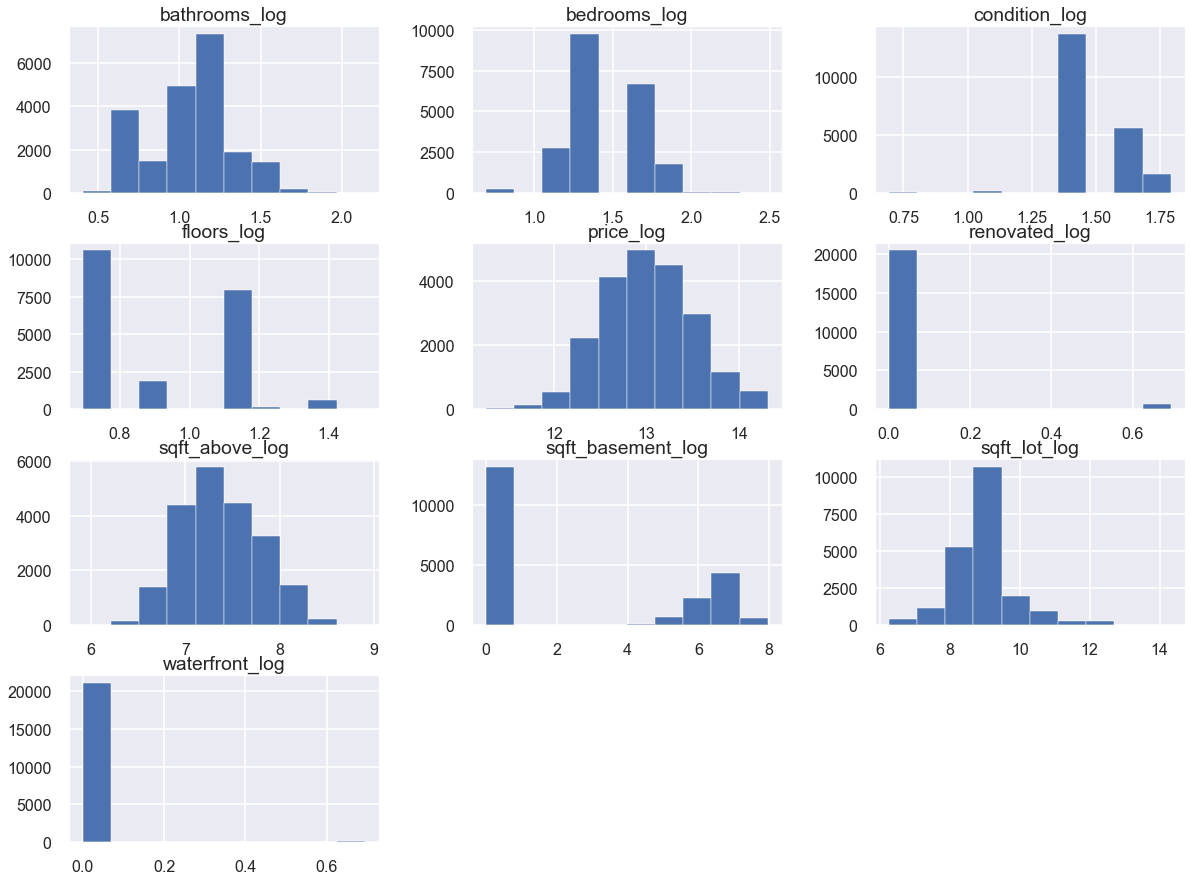

In [67]:
# df_logged.hist(figsize=(20,15))

In [74]:
# # Put dataset back together
# df_preprocessed = df_logged.copy()
# for non_logged in df_cleaned[['zipcode', 'long', 'lat', 'yr_built']].columns:
#     df_preprocessed[non_logged] = df_cleaned[non_logged]
# df_preprocessed

,price_log,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,waterfront_log,condition_log,sqft_above_log,sqft_basement_log,renovated_log,zipcode,long,lat,yr_built
0,12.30999,1.38629,0.69315,8.63959,0.69315,0.00000,1.38629,7.07412,0.00000,0.00000,98178,-122.25700,47.51120,1955
1,13.19562,1.38629,1.17865,8.88779,1.09861,0.00000,1.38629,7.68294,5.99396,0.69315,98125,-122.31900,47.72100,1951
2,12.10072,1.09861,0.69315,9.21044,0.69315,0.00000,1.38629,6.64769,0.00000,0.00000,98028,-122.23300,47.73790,1933
3,13.31133,1.60944,1.38629,8.51739,0.69315,0.00000,1.79176,6.95750,6.81454,0.00000,98136,-122.39300,47.52080,1965
4,13.14217,1.38629,1.09861,8.99727,0.69315,0.00000,1.38629,7.42714,0.00000,0.00000,98074,-122.04500,47.61680,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.79386,1.38629,1.25276,7.03174,1.38629,0.00000,1.38629,7.33368,0.00000,0.00000,98103,-122.34600,47.69930,2009
21593,12.89922,1.60944,1.25276,8.66802,1.09861,0.00000,1.38629,7.74544,0.00000,0.00000,98146,-122.36200,47.51070,2014
21594,12.90446,1.09861,0.55962,7.20860,1.09861,0.00000,1.38629,6.92854,0.00000,0.00000,98144,-122.29900,47.59440,2009
21595,12.89922,1.38629,1.25276,7.77863,1.09861,0.00000,1.38629,7.37838,0.00000,0.00000,98027,-122.06900,47.53450,2004


In [96]:
# Bring price column back to beginning of df
# price = df_preproccesed_ohe['price_log']
# df_preproccesed_ohe.drop(labels=['price_log'], axis=1, inplace=True)
# df_preproccesed_ohe.insert(loc=0, column='price_log', value=price)
# df_preproccesed_ohe.head()

C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price_log,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,waterfront_log,condition_log,sqft_above_log,sqft_basement_log,renovated_log,long,lat,yr_built,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98198,zipcode_98199
0,12.30999,1.38629,0.69315,8.63959,0.69315,0.00000,1.38629,7.07412,0.00000,0.00000,-122.25700,47.51120,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,13.19562,1.38629,1.17865,8.88779,1.09861,0.00000,1.38629,7.68294,5.99396,0.69315,-122.31900,47.72100,1951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,12.10072,1.09861,0.69315,9.21044,0.69315,0.00000,1.38629,6.64769,0.00000,0.00000,-122.23300,47.73790,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.31133,1.60944,1.38629,8.51739,0.69315,0.00000,1.79176,6.95750,6.81454,0.00000,-122.39300,47.52080,1965,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,13.14217,1.38629,1.09861,8.99727,0.69315,0.00000,1.38629,7.42714,0.00000,0.00000,-122.04500,47.61680,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Check assumption final time

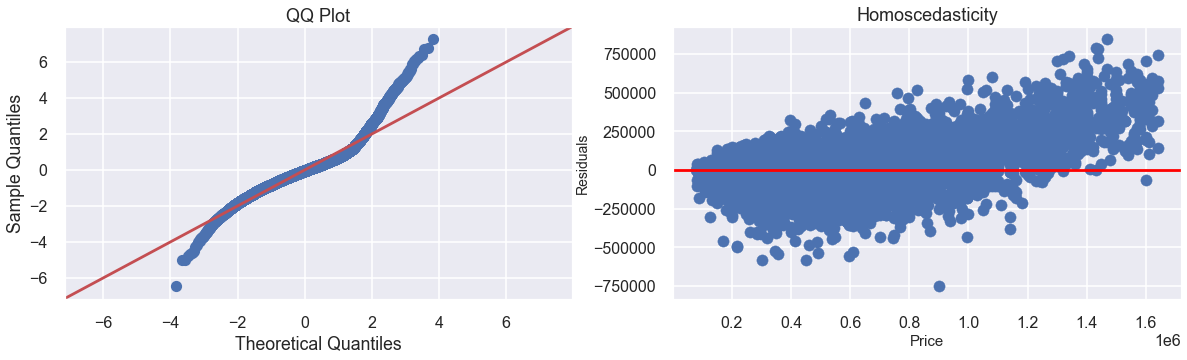

In [221]:
check_for_assumptions(model.resid)

# INTERPRET

### Observations
* R2 is very high at .834 meaning over 80% of the data fit the regression model
* p-values are low enough to say that the predictors were statistically significant

In [225]:
# Train vs Test R^2
train_r2 = r2_score(train['price'], model.predict(train))
print(f'train r2 = {round(train_r2,3)}')

test_r2 = r2_score(test['price'], model.predict(test))
print(f'test r2 = {round(test_r2,3)}')

train r2 = 0.799
test r2 = 0.79


In [230]:
coeffs = model.params.sort_values(ascending=False)
no_zipcodes = [coef for coef in coeffs.index if 'zipcode' not in coef]
coeffs = coeffs[no_zipcodes]
frame = coeffs.to_frame('Coefficients')
styler = frame.style.background_gradient(cmap='Blues')
styler

,Coefficients
waterfront,429853
lat,275124
renovated,43070.7
condition,25200.1
bathrooms,24420.3
sqft_above,213.337
sqft_basement,133.447
sqft_lot,0.279454
yr_built,-121.975
bedrooms,-21381.7


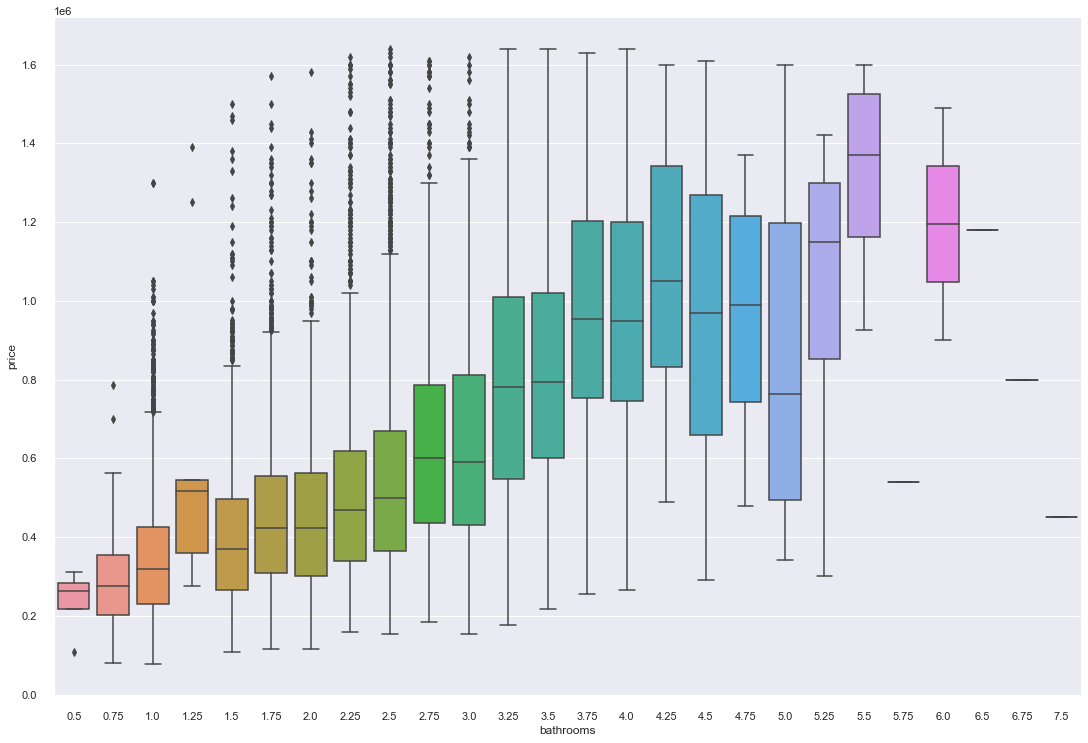

In [248]:
g = sns.catplot(data=df_preproccesed_ohe, x='bathrooms', y='price', kind='box')
g.fig.set_figwidth(18)
g.fig.set_figheight(12)

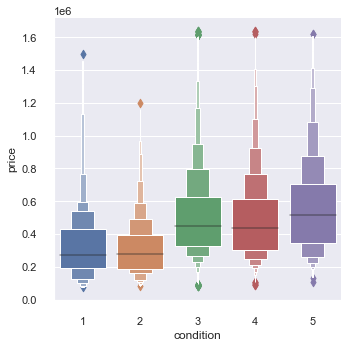

In [268]:
g = sns.catplot(data=df_preproccesed_ohe, x='condition', y='price', kind='boxen')

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

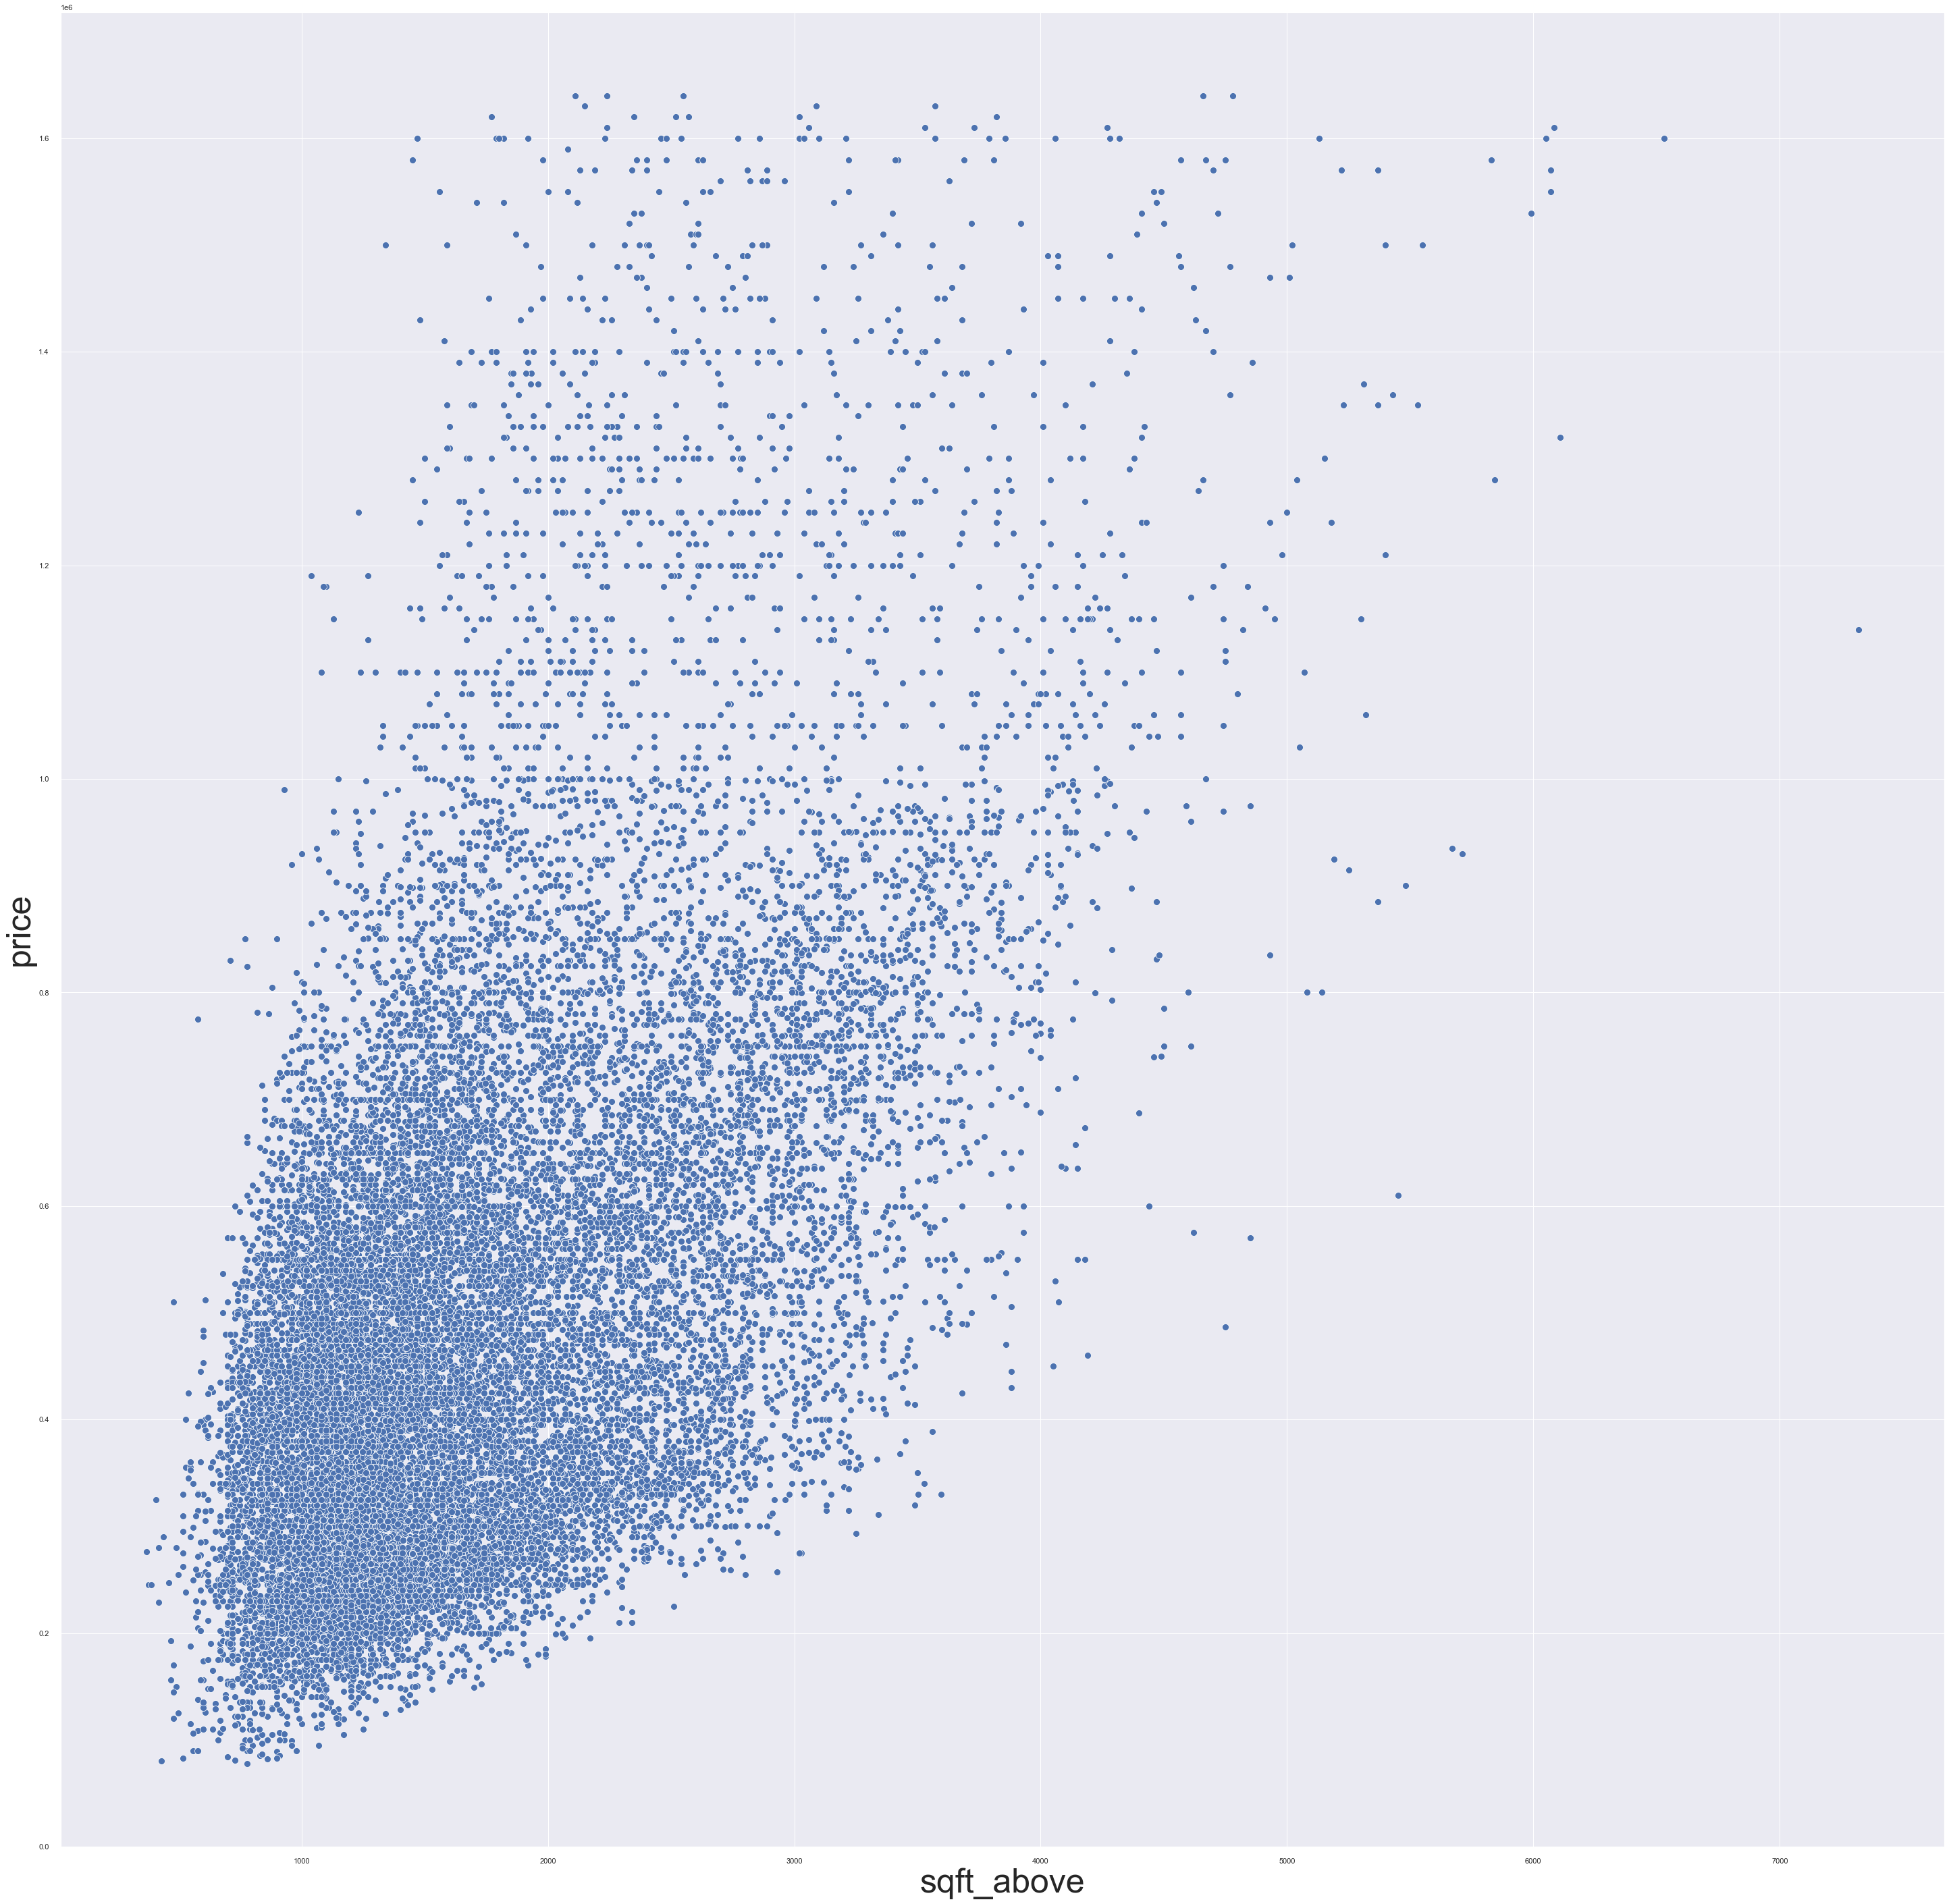

In [282]:
plt.rcParams["axes.labelsize"] = 50
sns.scatterplot(data=df_preproccesed_ohe, x='sqft_above', y='price', s=100)

# CONCLUSIONS & RECOMMENDATIONS

- We have found that square footage is key in raising market selling price, therefore people should try to maximize the square footage of their home to increase their value
- We recommend that all of our customers increase the condition of their home. Each point increase in condition increases the value of the home on average by $25,200
- Putting a good number of bathrooms is proven to be a good way of increasing home value